In [1]:
import numpy as np

In [2]:
np.random.seed(666)

In [3]:
x = 2 * np.random.random(size=100)
x

array([1.40087424, 1.68837329, 1.35302867, 1.45571611, 1.90291591,
       0.02540639, 0.8271754 , 0.09762559, 0.19985712, 1.01613261,
       0.40049508, 1.48830834, 0.38578401, 1.4016895 , 0.58645621,
       1.54895891, 0.01021768, 0.22571531, 0.22190734, 0.49533646,
       0.0464726 , 1.45464231, 0.68006988, 0.39500631, 1.81835919,
       1.95669397, 1.06560509, 0.5182637 , 1.16762524, 0.65138131,
       1.77779863, 1.25280905, 1.63774738, 1.09469084, 0.83342401,
       1.48609438, 0.73919276, 0.15033309, 1.55038596, 0.43881849,
       0.15868425, 0.97356104, 0.3073478 , 1.65693027, 0.38273714,
       0.54081791, 1.12206884, 1.80476078, 1.70357668, 0.83616392,
       0.78695254, 0.03244103, 0.59842674, 0.70755644, 1.78700533,
       1.57227314, 1.54277385, 0.84010971, 1.55205028, 0.92861629,
       0.36354033, 1.76805121, 1.43758454, 1.3437626 , 0.51312727,
       0.86160364, 0.03290715, 0.46998765, 1.02234262, 0.58401848,
       1.00378702, 0.99654626, 0.20754305, 0.89288623, 1.93837

In [4]:
y = x * 3. + 4. + np.random.normal(size=100)

In [5]:
import matplotlib.pyplot as plt

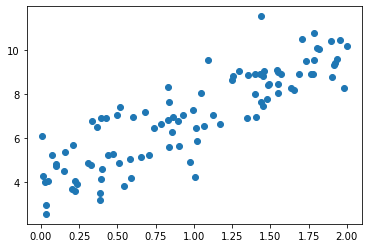

In [6]:
plt.scatter(x, y);
plt.show()

In [7]:
X = x.reshape(-1, 1)
X.shape

(100, 1)

In [8]:
def J(theta, X_b, y):
    try:
        return np.sum((X_b.dot(theta) - y) ** 2) / len(X_b)
    except:
        return float('inf')

In [9]:
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:, i])
    
    return res * 2 / len(X_b)

In [10]:
def gradient_decent(X_b, y, initial_theta, eta, n_iters=1e4, epslion=1e-8):
    
    theta = initial_theta
    i_iter = 0
    
    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        
        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epslion):
            break
        
        i_iter += 1
    
    return theta

In [11]:
X_b = np.hstack([np.ones(shape=(len(X), 1)), X])
X_b.shape

(100, 2)

In [12]:
initial_theta = np.zeros(shape=X_b.shape[1])
eta = 0.01
theta = gradient_decent(X_b, y, initial_theta, eta)

In [13]:
theta

array([4.02145786, 3.00706277])

In [14]:
from PlayML.LinearRegression import LinearRegression

In [15]:
linear_reg = LinearRegression()

In [16]:
linear_reg.fit_gd(X, y, 0., 0.01)

LinearRegression()

In [17]:
linear_reg.coef_

array([3.00517447])

In [18]:
linear_reg.intercept_

4.02369667210379